<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 6
## Ejercicio integrador de exámen
### Jorge Andres Niño


## Consigna

Resolver los puntos mostrados en el siguiente documento:

## Síntesis de la función transferencia y circuito normalizado.

Se presenta la síntesis de la función transferencia a partir de la función de maxima planicidad, que se usa como butterworth pero calculando la $ \omega_B$ para un filtro pasa-altos. Al llegar al polinomio final de orden 3, se aplica el nucleo de transformación, y luego se sintetiza el circuito, al calcular los valores de los componentes se emplea la $ \omega_B = \epsilon^{1/n}$

In [3]:
from IPython.display import IFrame, display
IFrame("./Ejercicio integrador teoria moderna_TS6.docx", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [4]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


<IPython.core.display.Math object>

<IPython.core.display.Math object>

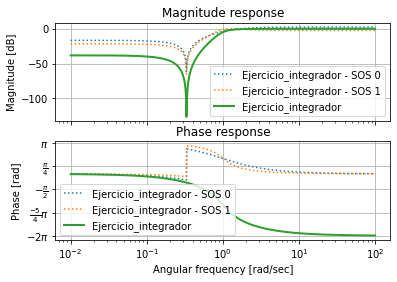

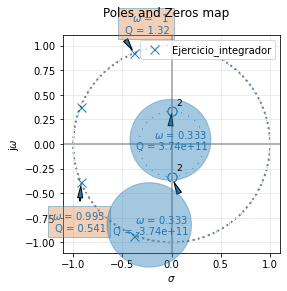

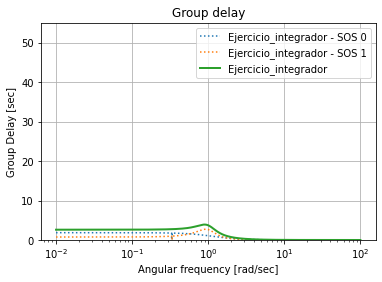

In [5]:
#%% Funcion trasnferencia:
w0 = 1
wn = 1/3
num1= np.array([w0**4,0,2*w0**2*wn**2,0,wn**4])
den1 = np.array([w0**4,2.6*w0**3,3.4*w0**2, 2.61*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
pretty_print_lti(num1, den1)
fig_sz_x = 20
fig_sz_y = 10
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# particiono en SOS's para la implementación
sos_hp = tf2sos_analog(num1, den1)
pretty_print_SOS(sos_hp)
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
analyze_sys(sos_hp, 'Ejercicio_integrador')

Probamos una primera aproximación en LTSPICE normalizado con bicuadráticas, empleando ceros de transmisión en el punto deseado:

![*Figura 6*](LTCIR.png)

![*Figura 7*](LTSIM.png)

En la figura de la respuesta en frecuencia podemos observar que el primer cursor nos señala $-2.97 db$ a $160.17 mHz$ que corresponde a la $f_0 = \frac{w_0}{2\pi}$. Luego en $f= 53mHz$, con el segundo cursor obtenemos el cero de transmisión a $\omega_N={\omega}_0/3$. Con lo cual podemos observar que estos valores normalizados cumplen con la plantilla.

## Implementación mediante circuito Bicuad

A continuación podemos emplear la estructura bicuad mencionada en el planteo del problema, para sintetizar cada una de las funciones SOS de tal manera que cascadeandolas obtengamos la misma respuesta que en el caso anterior.

![*Figura 8*](LTCIRGIC.png)

![*Figura 9*](LTSIMGIC.png)

# Conclusiones:
 